<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [ ]:
y['income'] = y['income'].replace({
    '>50K.': 1,
    '<=50K.': 0,
    '>50K': 1,
    '<=50K': 0
})

<ipython-input-3-1b81378997f7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['income'] = y['income'].replace({
<ipython-input-3-1b81378997f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({


In [ ]:
Data=pd.concat([X, y], axis=1)

In [ ]:
Data.drop_duplicates(inplace=True)

In [ ]:
Data.dropna(inplace=True)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47573 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47573 non-null  int64 
 1   workclass       47573 non-null  object
 2   fnlwgt          47573 non-null  int64 
 3   education       47573 non-null  object
 4   education-num   47573 non-null  int64 
 5   marital-status  47573 non-null  object
 6   occupation      47573 non-null  object
 7   relationship    47573 non-null  object
 8   race            47573 non-null  object
 9   sex             47573 non-null  object
 10  capital-gain    47573 non-null  int64 
 11  capital-loss    47573 non-null  int64 
 12  hours-per-week  47573 non-null  int64 
 13  native-country  47573 non-null  object
 14  income          47573 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.8+ MB


In [ ]:
Data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
col=list(Data['relationship'].unique())
col

['Not-in-family',
 'Husband',
 'Wife',
 'Own-child',
 'Unmarried',
 'Other-relative']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


onehot_columns = ['workclass', 'occupation', 'race', 'native-country']
ordinal_columns = ['education', 'marital-status', 'relationship', 'sex']
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain',
                     'capital-loss', 'hours-per-week']

target_column = 'income'

education_categories = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]

marital_categories = [
    'Never-married', 'Married-civ-spouse', 'Married-AF-spouse',
    'Married-spouse-absent', 'Separated', 'Divorced', 'Widowed'
]

relationship_categories = [
    'Own-child', 'Other-relative', 'Not-in-family', 'Unmarried', 'Husband', 'Wife'
]

sex_categories = ['Female', 'Male']

ordinal_categories = [
    education_categories if col == 'education' else
    marital_categories if col == 'marital-status' else
    relationship_categories if col == 'relationship' else
    sex_categories if col == 'sex' else 'auto'
    for col in ordinal_columns
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_columns),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), onehot_columns)
    ],
    remainder='drop')


X = Data.drop(columns=[target_column], errors='ignore')
transformed_data = preprocessor.fit_transform(X)

numerical_column_names = [f"{col}_scaled" for col in numerical_columns]

ordinal_column_names = [f"{col}_ordinal" for col in ordinal_columns]

onehot_encoder = preprocessor.named_transformers_['cat']
onehot_column_names = onehot_encoder.get_feature_names_out(onehot_columns)

all_column_names = numerical_column_names + ordinal_column_names + list(onehot_column_names)

transformed_Data = pd.DataFrame(transformed_data, columns=all_column_names, index=X.index)

if target_column in Data.columns:
    transformed_Data[target_column] = Data[target_column].values

In [ ]:
transformed_Data.head()

,age_scaled,fnlwgt_scaled,education-num_scaled,capital-gain_scaled,capital-loss_scaled,hours-per-week_scaled,education_ordinal,marital-status_ordinal,relationship_ordinal,sex_ordinal,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.025908,-1.062834,1.132870,0.144411,-0.217571,-0.049262,12.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.837306,-1.007948,1.132870,-0.145810,-0.217571,-2.251382,12.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.047856,0.245441,-0.425211,-0.145810,-0.217571,-0.049262,8.0,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.058596,0.426106,-1.204251,-0.145810,-0.217571,-0.049262,6.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.785490,1.408170,1.132870,-0.145810,-0.217571,-0.049262,12.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X=transformed_Data.drop(columns=['income'])
y=transformed_Data['income']

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgbc=XGBClassifier(n_estimators=100, learning_rate=0.1)
xgbc.fit(X_train, y_train)
y_pred=xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7106
           1       0.79      0.66      0.72      2409

    accuracy                           0.87      9515
   macro avg       0.84      0.80      0.82      9515
weighted avg       0.86      0.87      0.86      9515



In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7106
           1       0.75      0.60      0.66      2409

    accuracy                           0.85      9515
   macro avg       0.81      0.76      0.78      9515
weighted avg       0.84      0.85      0.84      9515



In [ ]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7106
           1       0.74      0.62      0.68      2409

    accuracy                           0.85      9515
   macro avg       0.81      0.77      0.79      9515
weighted avg       0.84      0.85      0.84      9515



In [ ]:
svc=SVC(kernel='rbf', C=1.0,probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7106
           1       0.77      0.57      0.65      2409

    accuracy                           0.85      9515
   macro avg       0.82      0.76      0.78      9515
weighted avg       0.84      0.85      0.84      9515



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7106
           1       0.75      0.57      0.65      2409

    accuracy                           0.84      9515
   macro avg       0.81      0.75      0.77      9515
weighted avg       0.83      0.84      0.83      9515



In [ ]:
models = {
    'LogisticRegression': lr,
    'RandomForestClassifier': rfc,
    'XGBClassifier': xgbc,
    'MLPClassifier': mlp,
    'SVC': svc
}

print("Individual Model Performance:")
print("-" * 30)
individual_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    individual_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Individual Model Performance:
------------------------------
LogisticRegression Accuracy: 0.8468
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7106
           1       0.75      0.60      0.66      2409

    accuracy                           0.85      9515
   macro avg       0.81      0.76      0.78      9515
weighted avg       0.84      0.85      0.84      9515

------------------------------
RandomForestClassifier Accuracy: 0.8472
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7106
           1       0.73      0.62      0.67      2409

    accuracy                           0.85      9515
   macro avg       0.81      0.77      0.79      9515
weighted avg       0.84      0.85      0.84      9515

------------------------------
XGBClassifier Accuracy: 0.8687
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7106
       

In [ ]:
hard_voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rfc),
        ('xgb', xgbc),
        ('mlp', mlp),
        ('svc', svc)
    ],
    voting='hard'
)

soft_voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rfc),
        ('xgb', xgbc),
        ('mlp', mlp),
        ('svc', svc)
    ],
    voting='soft'
)

In [ ]:
hard_voting.fit(X_train, y_train)
hard_pred = hard_voting.predict(X_test)
hard_accuracy = accuracy_score(y_test, hard_pred)

print("Hard Voting Ensemble Performance:")
print("-" * 30)
print(f"Accuracy: {hard_accuracy:.4f}")
print(classification_report(y_test, hard_pred))
print("-" * 30)

Hard Voting Ensemble Performance:
------------------------------
Accuracy: 0.8581
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7106
           1       0.77      0.63      0.69      2409

    accuracy                           0.86      9515
   macro avg       0.83      0.78      0.80      9515
weighted avg       0.85      0.86      0.85      9515

------------------------------


In [ ]:
soft_voting.fit(X_train, y_train)
soft_pred = soft_voting.predict(X_test)
soft_accuracy = accuracy_score(y_test, soft_pred)

print("Soft Voting Ensemble Performance:")
print("-" * 30)
print(f"Accuracy: {soft_accuracy:.4f}")
print(classification_report(y_test, soft_pred))
print("-" * 30)

Soft Voting Ensemble Performance:
------------------------------
Accuracy: 0.8590
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7106
           1       0.79      0.60      0.68      2409

    accuracy                           0.86      9515
   macro avg       0.83      0.77      0.80      9515
weighted avg       0.85      0.86      0.85      9515

------------------------------


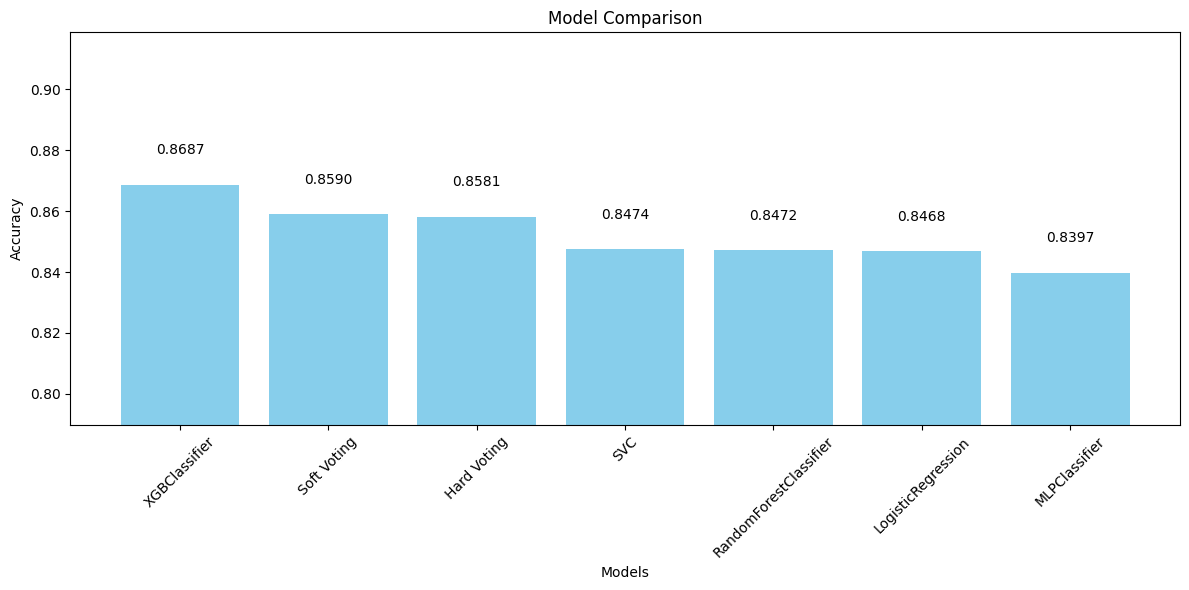

In [ ]:
accuracies = {**individual_accuracies, 'Hard Voting': hard_accuracy, 'Soft Voting': soft_accuracy}
models_df = pd.DataFrame({'Model': list(accuracies.keys()), 'Accuracy': list(accuracies.values())})
models_df = models_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.bar(models_df['Model'], models_df['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(min(accuracies.values()) - 0.05, max(accuracies.values()) + 0.05)
for i, v in enumerate(models_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

In [ ]:
weighted_soft_voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rfc),
        ('xgb', xgbc),
        ('mlp', mlp),
        ('svc', svc)
    ],
    voting='soft',
    weights=[1, 2, 2, 1, 1]
)

weighted_soft_voting.fit(X_train, y_train)
weighted_soft_pred = weighted_soft_voting.predict(X_test)
weighted_soft_accuracy = accuracy_score(y_test, weighted_soft_pred)

print("Weighted Soft Voting Ensemble Performance:")
print("-" * 30)
print(f"Accuracy: {weighted_soft_accuracy:.4f}")
print(classification_report(y_test, weighted_soft_pred))

Weighted Soft Voting Ensemble Performance:
------------------------------
Accuracy: 0.8627
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7106
           1       0.78      0.64      0.70      2409

    accuracy                           0.86      9515
   macro avg       0.83      0.79      0.81      9515
weighted avg       0.86      0.86      0.86      9515



In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]

    max_avg = np.mean(np.max(probs))
    avg = np.mean(probs)

    weights = np.ones_like(probs) / len(probs)
    weight_avg = np.average(probs, weights=weights)

    results[name] = {
        'MaxAvrg': max_avg,
        'Avrg': avg,
        'WeightAvrg': weight_avg
    }

for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print("-" * 30)
    print(f"MaxAvrg: {metrics['MaxAvrg']:.4f}")
    print(f"Avrg: {metrics['Avrg']:.4f}")
    print(f"WeightAvrg: {metrics['WeightAvrg']:.4f}")
    print("-" * 30)

LogisticRegression Performance:
------------------------------
MaxAvrg: 1.0000
Avrg: 0.2478
WeightAvrg: 0.2478
------------------------------
RandomForestClassifier Performance:
------------------------------
MaxAvrg: 1.0000
Avrg: 0.2508
WeightAvrg: 0.2508
------------------------------
XGBClassifier Performance:
------------------------------
MaxAvrg: 0.9990
Avrg: 0.2492
WeightAvrg: 0.2492
------------------------------
MLPClassifier Performance:
------------------------------
MaxAvrg: 1.0000
Avrg: 0.2638
WeightAvrg: 0.2638
------------------------------
SVC Performance:
------------------------------
MaxAvrg: 1.0000
Avrg: 0.2509
WeightAvrg: 0.2509
------------------------------


In [ ]:
all_probs = []

for name, model in models.items():
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]
    all_probs.append(probs)

all_probs = np.array(all_probs).T

combined_probs = np.mean(all_probs, axis=1)

max_avg = np.mean(np.max(all_probs, axis=1))
avg = np.mean(combined_probs)
weights = np.ones_like(combined_probs) / len(combined_probs)
weight_avg = np.average(combined_probs, weights=weights)

print("Combined Performance Across All Models:")
print("-" * 40)
print(f"MaxAvrg: {max_avg:.4f}")
print(f"Avrg: {avg:.4f}")
print(f"WeightAvrg: {weight_avg:.4f}")
print("-" * 40)

Combined Performance Across All Models:
----------------------------------------
MaxAvrg: 0.3345
Avrg: 0.2463
WeightAvrg: 0.2463
----------------------------------------



===== Individual Model Performance =====
LogisticRegression:
  Accuracy: 0.8468
  Precision: 0.7457
  Recall: 0.5990
  F1 Score: 0.6644
RandomForestClassifier:
  Accuracy: 0.8467
  Precision: 0.7331
  Recall: 0.6202
  F1 Score: 0.6719
XGBClassifier:
  Accuracy: 0.8687
  Precision: 0.7886
  Recall: 0.6579
  F1 Score: 0.7174
MLPClassifier:
  Accuracy: 0.8357
  Precision: 0.6728
  Recall: 0.6837
  F1 Score: 0.6782
SVC:
  Accuracy: 0.8474
  Precision: 0.7669
  Recall: 0.5708
  F1 Score: 0.6545

===== Ensemble Methods =====
MaxAvrg (Maximum Average):
  Accuracy: 0.8357
  Precision: 0.6445
  Recall: 0.7833
  F1 Score: 0.7071

Avrg (Simple Average):
  Accuracy: 0.8583
  Precision: 0.7683
  Recall: 0.6306
  F1 Score: 0.6927

WeightAvrg (Weighted Average):
  Accuracy: 0.8637
  Precision: 0.7819
  Recall: 0.6401
  F1 Score: 0.7039


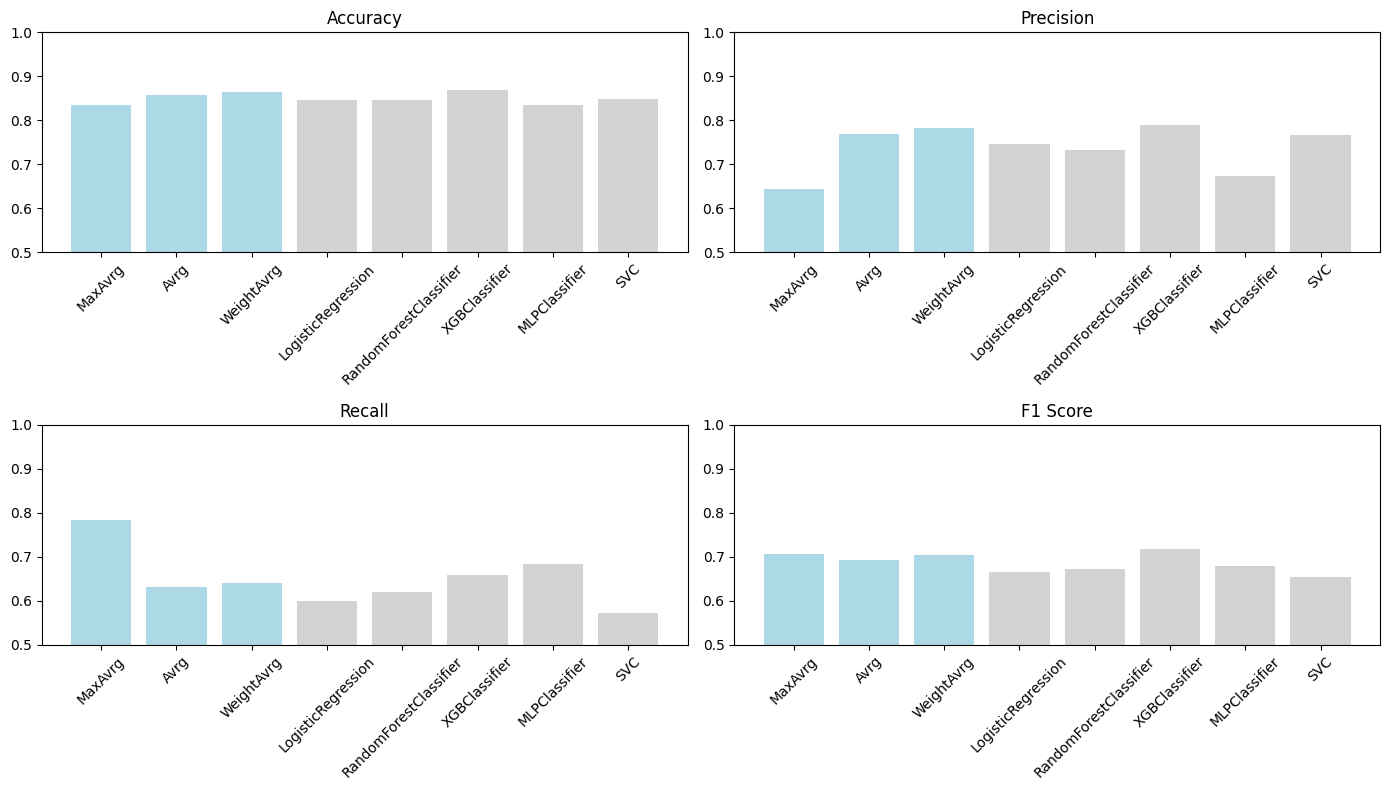


Results sorted by accuracy:
                   Method  Accuracy  Precision    Recall  F1 Score
0           XGBClassifier  0.868734   0.788557  0.657949  0.717357
1              WeightAvrg  0.863689   0.781947  0.640100  0.703949
2                    Avrg  0.858329   0.768336  0.630552  0.692658
3                     SVC  0.847399   0.766871  0.570776  0.654450
4      LogisticRegression  0.846768   0.745736  0.599004  0.664365
5  RandomForestClassifier  0.846663   0.733072  0.620174  0.671914
6                 MaxAvrg  0.835733   0.644467  0.783313  0.707139
7           MLPClassifier  0.835733   0.672794  0.683686  0.678196


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = {}
probabilities = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

    if len(np.unique(y_train)) == 2:
        probabilities[name] = model.predict_proba(X_test)[:, 1]
    else:
        probabilities[name] = model.predict_proba(X_test)

if len(np.unique(y_train)) == 2:
    all_probs = np.column_stack([probabilities[name] for name in models.keys()])

    max_probs = np.max(all_probs, axis=1)

    max_avrg_preds = (max_probs > 0.5).astype(int)

    max_avrg_accuracy = accuracy_score(y_test, max_avrg_preds)
    max_avrg_precision = precision_score(y_test, max_avrg_preds, average='binary')
    max_avrg_recall = recall_score(y_test, max_avrg_preds, average='binary')
    max_avrg_f1 = f1_score(y_test, max_avrg_preds, average='binary')
else:
    all_class_preds = np.array([np.argmax(prob, axis=1) for name, prob in probabilities.items()]).T

    n_classes = len(np.unique(y_train))
    max_votes = np.zeros((len(y_test), n_classes))

    for i in range(len(y_test)):
        for j in range(n_classes):
            max_votes[i, j] = np.sum(all_class_preds[i] == j)

    max_avrg_preds = np.argmax(max_votes, axis=1)

    max_avrg_accuracy = accuracy_score(y_test, max_avrg_preds)
    max_avrg_precision = precision_score(y_test, max_avrg_preds, average='weighted')
    max_avrg_recall = recall_score(y_test, max_avrg_preds, average='weighted')
    max_avrg_f1 = f1_score(y_test, max_avrg_preds, average='weighted')

if len(np.unique(y_train)) == 2:
    avg_probs = np.mean(all_probs, axis=1)

    avg_preds = (avg_probs > 0.5).astype(int)

    avg_accuracy = accuracy_score(y_test, avg_preds)
    avg_precision = precision_score(y_test, avg_preds, average='binary')
    avg_recall = recall_score(y_test, avg_preds, average='binary')
    avg_f1 = f1_score(y_test, avg_preds, average='binary')
else:
    avg_probs = np.zeros((len(y_test), n_classes))

    for name, prob in probabilities.items():
        avg_probs += prob

    avg_probs /= len(models)

    avg_preds = np.argmax(avg_probs, axis=1)

    avg_accuracy = accuracy_score(y_test, avg_preds)
    avg_precision = precision_score(y_test, avg_preds, average='weighted')
    avg_recall = recall_score(y_test, avg_preds, average='weighted')
    avg_f1 = f1_score(y_test, avg_preds, average='weighted')

weights = {
    'LogisticRegression': 1.0,
    'RandomForestClassifier': 2.0,
    'XGBClassifier': 2.0,
    'MLPClassifier': 1.0,
    'SVC': 1.0
}

total_weight = sum(weights.values())
normalized_weights = {model: weight/total_weight for model, weight in weights.items()}

if len(np.unique(y_train)) == 2:
    weighted_avg_probs = np.zeros(len(y_test))

    for name, prob in probabilities.items():
        weighted_avg_probs += prob * normalized_weights[name]

    weighted_avg_preds = (weighted_avg_probs > 0.5).astype(int)

    weighted_avg_accuracy = accuracy_score(y_test, weighted_avg_preds)
    weighted_avg_precision = precision_score(y_test, weighted_avg_preds, average='binary')
    weighted_avg_recall = recall_score(y_test, weighted_avg_preds, average='binary')
    weighted_avg_f1 = f1_score(y_test, weighted_avg_preds, average='binary')
else:
    weighted_avg_probs = np.zeros((len(y_test), n_classes))

    for name, prob in probabilities.items():
        weighted_avg_probs += prob * normalized_weights[name]

    weighted_avg_preds = np.argmax(weighted_avg_probs, axis=1)

    weighted_avg_accuracy = accuracy_score(y_test, weighted_avg_preds)
    weighted_avg_precision = precision_score(y_test, weighted_avg_preds, average='weighted')
    weighted_avg_recall = recall_score(y_test, weighted_avg_preds, average='weighted')
    weighted_avg_f1 = f1_score(y_test, weighted_avg_preds, average='weighted')

print("\n===== Individual Model Performance =====")
for name in models.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    if len(np.unique(y_train)) == 2:
        print(f"  Precision: {precision_score(y_test, predictions[name], average='binary'):.4f}")
        print(f"  Recall: {recall_score(y_test, predictions[name], average='binary'):.4f}")
        print(f"  F1 Score: {f1_score(y_test, predictions[name], average='binary'):.4f}")
    else:
        print(f"  Precision: {precision_score(y_test, predictions[name], average='weighted'):.4f}")
        print(f"  Recall: {recall_score(y_test, predictions[name], average='weighted'):.4f}")
        print(f"  F1 Score: {f1_score(y_test, predictions[name], average='weighted'):.4f}")

print("\n===== Ensemble Methods =====")
print("MaxAvrg (Maximum Average):")
print(f"  Accuracy: {max_avrg_accuracy:.4f}")
print(f"  Precision: {max_avrg_precision:.4f}")
print(f"  Recall: {max_avrg_recall:.4f}")
print(f"  F1 Score: {max_avrg_f1:.4f}")

print("\nAvrg (Simple Average):")
print(f"  Accuracy: {avg_accuracy:.4f}")
print(f"  Precision: {avg_precision:.4f}")
print(f"  Recall: {avg_recall:.4f}")
print(f"  F1 Score: {avg_f1:.4f}")

print("\nWeightAvrg (Weighted Average):")
print(f"  Accuracy: {weighted_avg_accuracy:.4f}")
print(f"  Precision: {weighted_avg_precision:.4f}")
print(f"  Recall: {weighted_avg_recall:.4f}")
print(f"  F1 Score: {weighted_avg_f1:.4f}")

import matplotlib.pyplot as plt
import pandas as pd

methods = ['MaxAvrg', 'Avrg', 'WeightAvrg'] + list(models.keys())
accuracies = [max_avrg_accuracy, avg_accuracy, weighted_avg_accuracy] + [accuracy_score(y_test, predictions[name]) for name in models.keys()]
precisions = [max_avrg_precision, avg_precision, weighted_avg_precision] + [precision_score(y_test, predictions[name], average='weighted' if len(np.unique(y_train)) > 2 else 'binary') for name in models.keys()]
recalls = [max_avrg_recall, avg_recall, weighted_avg_recall] + [recall_score(y_test, predictions[name], average='weighted' if len(np.unique(y_train)) > 2 else 'binary') for name in models.keys()]
f1_scores = [max_avrg_f1, avg_f1, weighted_avg_f1] + [f1_score(y_test, predictions[name], average='weighted' if len(np.unique(y_train)) > 2 else 'binary') for name in models.keys()]

results_df = pd.DataFrame({
    'Method': methods,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

colors = ['lightblue', 'lightblue', 'lightblue'] + ['lightgray'] * len(models)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.bar(methods, accuracies, color=colors)
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.subplot(2, 2, 2)
plt.bar(methods, precisions, color=colors)
plt.title('Precision')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.subplot(2, 2, 3)
plt.bar(methods, recalls, color=colors)
plt.title('Recall')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.subplot(2, 2, 4)
plt.bar(methods, f1_scores, color=colors)
plt.title('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

print("\nResults sorted by accuracy:")
print(results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True))

In [ ]:
grid = [[9,1,7],[8,9,2],[3,4,6]]
all_nums=[num for row in grid for num in row]
all_nums.sort()
all_nums

[1, 2, 3, 4, 6, 7, 8, 9, 9]

In [ ]:
n=-1
for i in all_nums:
  if i=